In [1]:
## new Figure 14 of overview paper

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table

In [3]:
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
import astropy.table as table
# loads the current dwarf galaxy data catalog from the release page (recommended)
version_number_string = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/release_version.txt', format='ascii.fast_no_header')['col1'][0]
comb_all = table.Table.read('https://github.com/apace7/local_volume_database/releases/download/'+version_number_string+'/comb_all.csv')

In [5]:
comb_all = table.Table.read("../data/comb_all.csv")

In [6]:
dwarf_mw = comb_all[comb_all['table']=='dwarf_mw']
gc_harris = comb_all[comb_all['table']=='gc_harris']
gc_ambiguous = comb_all[comb_all['table']=='gc_ambiguous']
gc_mw_new = comb_all[comb_all['table']=='gc_mw_new']

In [7]:
color_dsph_mw = 'tab:blue'
color_dsph_m31 = 'tab:orange'
color_dsph_lf = 'tab:green'
color_dsph_lf_distant = 'tab:red'

color_gc_disk = '#9EDAE5' #'tab:brown'  #'tab:purple'
color_gc_harris = 'tab:brown'  #'#9EDAE5' #'tab:cyan'
color_gc_ufcss = 'tab:olive'

color_gc_dwarf = 'tab:pink'
color_gc_lmc_smc = 'darkgreen'

label_dsph_mw = r'${\rm Dwarf~MW}$'
label_dsph_m31 = r'${\rm Dwarf~M31}$'
label_dsph_lf = r'${\rm Dwarf~LF}$'
label_dsph_lf_distant = r'${\rm Dwarf~LV}$'
label_gc_ufcss = r'${\rm Ambiguous/HFCSS}$'
label_gc_harris = r'${\rm GC~Harris}$'
label_gc_disk =r'${\rm GC~New~Disk/Bulge/Halo}$'


In [8]:
def add_timescales(table_input):
    ## adds columns to input table
    
    average_mass_of_star = 0.4
    const = ((3.154e16)**2 *(3.086e16 )**-2) ## km -> kpc and s -> yr
    Gravity = 4.301e-6
    
    ## average number of stars for old/metal-poor system
    table_input['number_stellar'] = 10**table_input['mass_stellar']/average_mass_of_star 
        
    ## stellar only timescales 
    ## crossing time, relaxation time, and evaporation time
    table_input['time_cross_stellar'] = np.power(Gravity * (10**table_input['mass_stellar']/2.*(table_input['rhalf_sph_physical']/1000.)**-3.) * const, -0.5)
    table_input['time_relax_stellar'] = table_input['time_cross_stellar'] * table_input['number_stellar']/(8. * np.log(table_input['number_stellar']))
    table_input['time_evap_stellar'] = 140.*table_input['time_relax_stellar']
    
    ## dynamical timescales 
    table_input['time_cross_dynamical'] = np.power(Gravity * 4./3.*np.pi * (10**table_input['mass_dynamical_wolf']*(table_input['rhalf_sph_physical']/1000.)**-3.) * const, -0.5)
    
    ## https://ui.adsabs.harvard.edu/abs/2011PASA...28...77F/abstract 
    table_input['time_relax_dynamical'] = (10**table_input['mass_dynamical_wolf'])**0.5 * (table_input['rhalf_sph_physical'])**1.5 / np.log(10**table_input['mass_dynamical_wolf']) * 0.2/np.sqrt( 0.0045)/0.3
    
    ## https://ui.adsabs.harvard.edu/abs/2025arXiv250522717E/abstract 
    ## eqn 6 
    table_input['time_relax_errani'] = np.sqrt(2./3./np.pi/4.493e-6) * (10**table_input['mass_dynamical_wolf'] * table_input['rhalf_sph_physical']/1000.)**1.5 * table_input['number_stellar']**(-1) * (average_mass_of_star)**(-2) * (8.2 - 1.9 )**(-1)

    mass_to_light_extra = 50
    
    table_input['time_relax_dynamical_ml'] = (10**table_input['mass_stellar'] * mass_to_light_extra)**0.5 * (table_input['rhalf_sph_physical'])**1.5 / np.log(10**table_input['mass_stellar'] * mass_to_light_extra) * 0.2/np.sqrt( 0.0045)/0.3
    
    table_input['time_relax_dynamical_ul'] = (10**table_input['mass_dynamical_wolf_ul'])**0.5 * (table_input['rhalf_sph_physical'])**1.5 / np.log(10**table_input['mass_dynamical_wolf_ul']) * 0.2/np.sqrt( 0.0045)/0.3
        
    return table_input

In [9]:
gc_harris = add_timescales(gc_harris)
dwarf_mw = add_timescales(dwarf_mw)
gc_ambiguous = add_timescales(gc_ambiguous)
gc_mw_new = add_timescales(gc_mw_new)


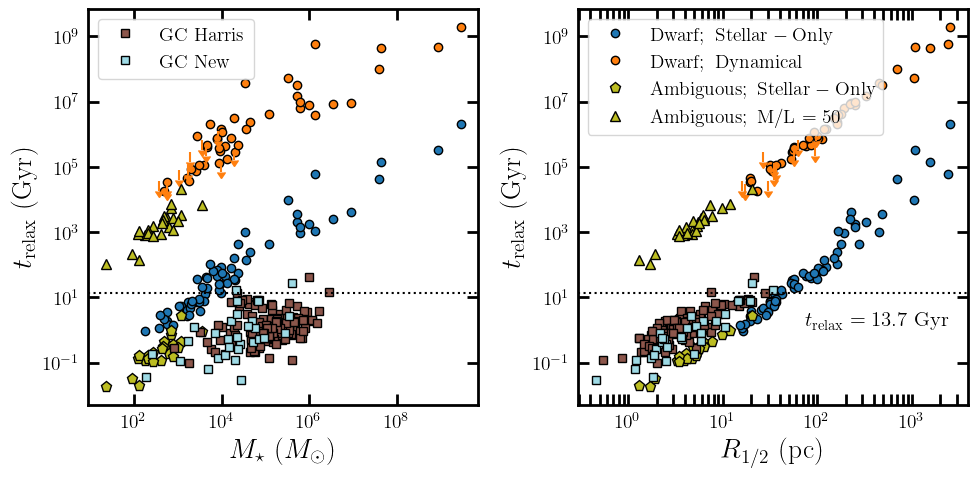

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].plot(10**dwarf_mw['mass_stellar'], dwarf_mw['time_relax_stellar'], 'o',  mec='k')

# plt.plot(dwarf_mw['rhalf_sph_physical'], dwarf_mw['time_cross_dynamical'], '.')
# plt.plot(dwarf_mw['rhalf_sph_physical'], dwarf_mw['time_relax_errani'], '.')
# ax[0].plot(10**dwarf_mw['mass_stellar'], dwarf_mw['time_relax_errani2'], 'o', label=r'${\rm Dwarf~MW~Dynamical}$', mec='k')
ax[0].plot(10**dwarf_mw['mass_stellar'], dwarf_mw['time_relax_dynamical'], 'o',  mec='k')
ax[0].errorbar(10**dwarf_mw['mass_stellar'], dwarf_mw['time_relax_dynamical_ul'], fmt='-', mec='k', c='tab:orange', yerr=dwarf_mw['time_relax_dynamical_ul']/2., uplims=True)

ax[0].plot(10**gc_ambiguous['mass_stellar'], gc_ambiguous['time_relax_stellar'], 'p',  mec='k', ms=8, c=color_gc_ufcss)
ax[0].plot(10**gc_ambiguous['mass_stellar'], gc_ambiguous['time_relax_dynamical_ml'], '^',  mec='k',  ms=7, c=color_gc_ufcss)
# plt.plot(10**gc_ambiguous['mass_stellar'], gc_ambiguous['time_relax_errani2'], '.', label=r'${\rm Ambiguous~Dyn}$')

ax[0].plot(10**gc_harris['mass_stellar'], gc_harris['time_relax_stellar'], 's', label=r'${\rm GC~Harris}$', mec='k', c=color_gc_harris)
ax[0].plot(10**gc_mw_new['mass_stellar'], gc_mw_new['time_relax_stellar'], 's', label=r'${\rm GC~New}$', mec='k', c=color_gc_disk)

# plt.plot(dwarf_mw['mass_stellar'], dwarf_mw['time_relax_errani']*(10/(dwarf_mw['mass_dynamical_wolf']/dwarf_mw['mass_stellar']))**(1.5), '.')
# plt.plot(dwarf_mw['mass_stellar'], dwarf_mw['time_relax_errani2']*(10/(dwarf_mw['mass_dynamical_wolf']/10**dwarf_mw['mass_stellar']))**(1.5), '.')
# plt.plot(gc_harris['mass_stellar'], gc_harris['time_cross'], '.')
# plt.plot(gc_ambiguous['mass_stellar'], gc_ambiguous['time_cross'], '.')

ax[1].plot(dwarf_mw['rhalf_sph_physical'], dwarf_mw['time_relax_stellar'], 'o', label=r'${\rm Dwarf;~Stellar-Only}$', mec='k')

ax[1].plot(dwarf_mw['rhalf_sph_physical'], dwarf_mw['time_relax_dynamical'], 'o', label=r'${\rm Dwarf;~Dynamical}$', mec='k')
ax[1].errorbar(dwarf_mw['rhalf_sph_physical'], dwarf_mw['time_relax_dynamical_ul'], fmt='-', mec='k', c='tab:orange', yerr=dwarf_mw['time_relax_dynamical_ul']/2., uplims=True)
# 'time_relax_errani2'

ax[1].plot(gc_ambiguous['rhalf_sph_physical'], gc_ambiguous['time_relax_stellar'], 'p', label=r'${\rm Ambiguous;~Stellar-Only}$', mec='k', ms=8, c=color_gc_ufcss)
ax[1].plot(gc_ambiguous['rhalf_sph_physical'], gc_ambiguous['time_relax_dynamical_ml'], '^',  mec='k', ms=7, c=color_gc_ufcss, label=r'${\rm Ambiguous;~M/L=50}$',)
# ax[1].plot(gc_ambiguous['rhalf_sph_physical'], gc_ambiguous['time_relax_errani3'], 'p', label=r'${\rm Ambiguous}$', mec='k', ms=9, c='red')
# plt.plot(gc_ambiguous['rhalf_sph_physical'], gc_ambiguous['time_relax_errani2'], '.', label=r'${\rm Ambiguous~Dyn}$')

ax[1].plot(gc_harris['rhalf_sph_physical'], gc_harris['time_relax_stellar'], 's',  mec='k', c=color_gc_harris)
ax[1].plot(gc_mw_new['rhalf_sph_physical'], gc_mw_new['time_relax_stellar'], 's',  mec='k', c=color_gc_disk)

ax[1].legend(loc=2)
ax[0].legend(loc=2)
# plt.gca().invert_xaxis()
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$M_{\star}~( M_{\odot})$')
ax[0].set_ylabel(r'$t_{\rm relax}~({\rm Gyr})$')

ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$R_{1/2}~({\rm pc})$')
ax[1].set_ylabel(r'$t_{\rm relax}~({\rm Gyr})$')

ax[0].axhline(13.7, c='k', ls=':')
ax[1].axhline(13.7, c='k', ls=":")
ax[1].text(.95, .2,r'$t_{\rm relax} = 13.7~{\rm Gyr}$', fontsize=15, horizontalalignment='right', transform=ax[1].transAxes)
# plt.text(.95, .075,r'${\rm Age}=13.7~{\rm Gyr}$', fontsize=15, horizontalalignment='right', transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig("timescales.pdf")
plt.show()